# GEC Data Science Program
# Level 2, Lab 2

## TensorFlow

https://www.tensorflow.org/

￼● Tensor: multidimensional array
    - a scalar is a tensor
    - a vector (or list, or array) is also a tensor
    - a matrix (or lists of lists, or 2d array) is a tensor
    - so is a cube, and so on

￼￼￼● Computation is defined as a Directed Acyclic Graph (DAG)

● The graph is a description (blueprint) of the computations to be executed

● Edges represent data (i.e., tensors) flowing between nodes in the graph

● Nodes represent Operations (Ops)

In [25]:
import tensorflow as tf

In [47]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [48]:
tf.reset_default_graph()

#### Example: c=a+b 

In [59]:
a = tf.constant([3,5,6],name='a')
b = tf.constant([5,7,9],name="b")
c = tf.add(a,b, name="c")

#### Graph Visualization by Tensorboard

In [26]:
graph = tf.get_default_graph().as_graph_def()
summary_writer = tf.summary.FileWriter('.',graph)
summary_writer.flush()

In [57]:
!pwd

/Users/shahab/Documents/GitHub/GEC_Lab_Level2


Run this in a terminal:
```sh
tensorboard  --logdir=[use above path in your system]
```

Open this page: http://localhost:6006/#graphs

In [52]:
with tf.Session() as sess:
    print sess.run(c)

[8]


In [61]:
sess = tf.InteractiveSession()

In [62]:
c.eval()

array([ 8, 12, 15], dtype=int32)

In [63]:
tf.reset_default_graph()

#### Q: Create a uniform random tensor (in [0,1]) of dimension [100] and add every element by 2. 

In [64]:
e = tf.random_uniform([100])
f = tf.fill([100],2.0)
g = tf.add(e,f)

In [65]:
with tf.Session() as sess:
    print(sess.run(g))

[ 2.84884882  2.90216208  2.73444676  2.8518877   2.92562723  2.85270596
  2.09173679  2.81257963  2.61351776  2.95038891  2.10801959  2.43143129
  2.66033125  2.35222101  2.20187473  2.60084772  2.00019622  2.56815481
  2.72517443  2.47258711  2.38642979  2.94764757  2.7146697   2.37053108
  2.52808237  2.81126356  2.24139643  2.15795565  2.54989862  2.26937699
  2.92067671  2.3338151   2.57674718  2.49892187  2.94958901  2.01838303
  2.31861162  2.26341343  2.78056431  2.68479395  2.32030153  2.36951637
  2.61800289  2.85871696  2.08483458  2.76824594  2.24874616  2.27266979
  2.78565073  2.86476946  2.86140132  2.4368906   2.48062754  2.03040743
  2.9578352   2.24092722  2.62124801  2.26221418  2.8515923   2.17377996
  2.46886754  2.85323477  2.74589205  2.06594753  2.71529579  2.19616818
  2.16308141  2.69800735  2.63016486  2.22506309  2.48406887  2.21584439
  2.31286955  2.10276651  2.74627137  2.28248429  2.24539566  2.40515852
  2.25567961  2.9417119   2.02984858  2.93191886  2

#### Matrix Multiplications

#### Q: Create a unifirm random matrix of size 10x10 and multiply by a matrix of size 10x2 filled with ones.

In [66]:
tf.reset_default_graph()

In [67]:
W = tf.random_uniform([10, 10])
x = tf.ones([10,2])
y=tf.matmul(W,x)

In [68]:
with tf.Session() as sess:
    print(sess.run(y))

[[ 5.44432735  5.44432735]
 [ 4.70958138  4.70958138]
 [ 3.28163242  3.28163242]
 [ 5.60735798  5.60735798]
 [ 5.8722086   5.8722086 ]
 [ 5.98618889  5.98618889]
 [ 4.04048061  4.04048061]
 [ 5.56471109  5.56471109]
 [ 5.84640837  5.84640837]
 [ 4.6834116   4.6834116 ]]


In [69]:
sess = tf.InteractiveSession()

In [71]:
y.eval()

array([[ 4.61885691,  4.61885691],
       [ 5.91026211,  5.91026211],
       [ 5.66952324,  5.66952324],
       [ 4.97964096,  4.97964096],
       [ 4.25178528,  4.25178528],
       [ 5.58699226,  5.58699226],
       [ 6.2204752 ,  6.2204752 ],
       [ 4.57622814,  4.57622814],
       [ 4.05226612,  4.05226612],
       [ 4.87133074,  4.87133074]], dtype=float32)

In [72]:
# won't work because we reset the graph
c.eval()

ValueError: Cannot use the default session to evaluate tensor: the tensor's graph is different from the session's graph. Pass an explicit session to `eval(session=sess)`.

In [73]:
sess.close()

#### ￼Main TF Math Ops
|Operation Type | Sample Ops                                      |
|:--------------|:------------------------------------------------|
|element-wise   | add, sub, mul, sqrt, pow, exp, log, cos, erf,...|
|array          | concat, slice, rank, shape, reshape             |
|matrix         | matmul, transpose, MatrixInverse, solve, svd,...|
|logical        | and, or, xor                                    |
|reduction      | reduce_sum, reduce_min,max                      |
|slicing/joining|tile, pack, unpack, split,...                    |
|               |                                                 |

### Q: Let $y = f(x) = 2x^2 - 5x + 2$. Write a TF program that generates a 2-D tensor of shape=[20, 2] as follows: 1st column contains values -20, ..., 19. Values in the 2nd column are $y_i = f(x_i)$ where $x_i$ is the corresponding value in the first column

#### Let's do it with numpy

In [74]:
x=np.arange(-20,20)
x=x.reshape((len(x),1))

In [75]:
x.shape

(40, 1)

In [76]:
y=np.hstack((x,2*x**2-5*x+2))

In [77]:
y

array([[-20, 902],
       [-19, 819],
       [-18, 740],
       [-17, 665],
       [-16, 594],
       [-15, 527],
       [-14, 464],
       [-13, 405],
       [-12, 350],
       [-11, 299],
       [-10, 252],
       [ -9, 209],
       [ -8, 170],
       [ -7, 135],
       [ -6, 104],
       [ -5,  77],
       [ -4,  54],
       [ -3,  35],
       [ -2,  20],
       [ -1,   9],
       [  0,   2],
       [  1,  -1],
       [  2,   0],
       [  3,   5],
       [  4,  14],
       [  5,  27],
       [  6,  44],
       [  7,  65],
       [  8,  90],
       [  9, 119],
       [ 10, 152],
       [ 11, 189],
       [ 12, 230],
       [ 13, 275],
       [ 14, 324],
       [ 15, 377],
       [ 16, 434],
       [ 17, 495],
       [ 18, 560],
       [ 19, 629]])

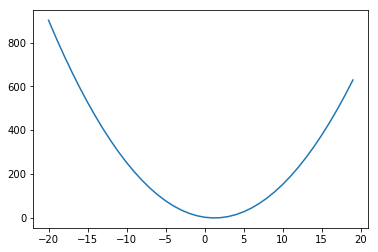

In [78]:
plt.plot(y[:,0],y[:,1]);

#### Tensorflow

In [79]:
tf.reset_default_graph()

In [80]:
sess=tf.InteractiveSession()

In [81]:
xx=tf.reshape(tf.range(-20,20),[40,1])
yy=2*tf.square(xx)-5*xx+2

In [82]:
xx,yy

(<tf.Tensor 'Reshape:0' shape=(40, 1) dtype=int32>,
 <tf.Tensor 'add:0' shape=(40, 1) dtype=int32>)

In [83]:
r = tf.concat([xx,yy],axis=1)

In [84]:
r_ev=r.eval()

In [85]:
r_ev

array([[-20, 902],
       [-19, 819],
       [-18, 740],
       [-17, 665],
       [-16, 594],
       [-15, 527],
       [-14, 464],
       [-13, 405],
       [-12, 350],
       [-11, 299],
       [-10, 252],
       [ -9, 209],
       [ -8, 170],
       [ -7, 135],
       [ -6, 104],
       [ -5,  77],
       [ -4,  54],
       [ -3,  35],
       [ -2,  20],
       [ -1,   9],
       [  0,   2],
       [  1,  -1],
       [  2,   0],
       [  3,   5],
       [  4,  14],
       [  5,  27],
       [  6,  44],
       [  7,  65],
       [  8,  90],
       [  9, 119],
       [ 10, 152],
       [ 11, 189],
       [ 12, 230],
       [ 13, 275],
       [ 14, 324],
       [ 15, 377],
       [ 16, 434],
       [ 17, 495],
       [ 18, 560],
       [ 19, 629]], dtype=int32)

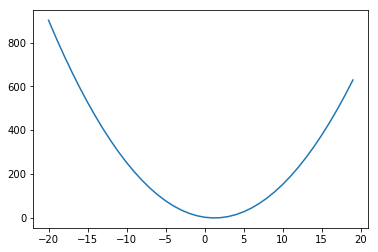

In [86]:
plt.plot(r_ev[:,0],r_ev[:,1])

### Q: How to find the minimum of this function using tensorflow?

### Optimization

#### Variables

In [87]:
xv=tf.Variable(-20.0)

In [ ]:
# gives error. we need to run global_variables_initializer() first.
xv.eval()

In [89]:
sess.run(tf.global_variables_initializer())

In [90]:
xv.eval()

-20.0

In [91]:
yv=2*tf.square(xv)-5*xv+2

In [92]:
yv.eval()

902.0

In [93]:
gd = tf.train.GradientDescentOptimizer(learning_rate=0.1)

In [94]:
z = gd.minimize(yv)

In [95]:
z

<tf.Operation 'GradientDescent' type=NoOp>

Let's look at the graph.
[Update the graph](#Graph-Visualization-by-Tensorboard)

In [97]:
converged=False
old_x=xv.eval()
while not converged:
    sess.run(z)
    print xv.eval(), yv.eval()
    if abs(old_x-xv.eval())<1e-5:
        converged=True
    old_x = xv.eval()

-11.5 324.0
-6.4 115.92
-3.34 41.0112
-1.504 14.044
-0.4024 4.33585
0.25856 0.840906
0.655136 -0.417274
0.893082 -0.870219
1.03585 -1.03328
1.12151 -1.09198
1.17291 -1.11311
1.20374 -1.12072
1.22225 -1.12346
1.23335 -1.12445
1.24001 -1.1248
1.24401 -1.12493
1.2464 -1.12497
1.24784 -1.12499
1.24871 -1.125
1.24922 -1.125
1.24953 -1.125
1.24972 -1.125
1.24983 -1.125
1.2499 -1.125
1.24994 -1.125
1.24996 -1.125
1.24998 -1.125
1.24999 -1.125


## Softmax

https://en.wikipedia.org/wiki/Softmax_function

### Numpy Softmax

#### Q: Write a Softmax function using numpy.

In [98]:
def softmax(x,t=1):
    # x should be 2d: array of vectors
    x1=x-np.max(x,axis=1, keepdims=True)
    x2=np.exp(x1/t)
    x3=x2/np.sum(x2, axis=1, keepdims=True)
    return x3

#### Q: What is softmax of [1,2,3,4,5]?

In [99]:
x=np.arange(1,6)

In [100]:
softmax([x])

array([[ 0.01165623,  0.03168492,  0.08612854,  0.23412166,  0.63640865]])

In [101]:
softmax([x], t=10)

array([[ 0.14884758,  0.14884758,  0.14884758,  0.14884758,  0.40460968]])

In [102]:
softmax([x], t=0.001)

array([[ 0.,  0.,  0.,  0.,  1.]])

### Q: Create a Softmax digit classifier using numpy.

In [103]:
d=pd.read_csv("./train.csv")

In [104]:
X=d.values[:,1:]

In [105]:
L=pd.get_dummies(d.label).values

In [106]:
L

array([[0, 1, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1]], dtype=uint8)

In [107]:
y=L

In [108]:
X.shape, y.shape

((42000, 784), (42000, 10))

$y'=softmax(XW+b)$

In [109]:
W=np.random.randn(X.shape[1],y.shape[1])

In [110]:
W.shape

(784, 10)

In [111]:
b=np.random.randn(*y.shape)

In [112]:
b.shape

(42000, 10)

In [113]:
y_hat=np.matmul(X,W)+b

In [114]:
rmse = np.mean((y-y_hat)**2)**0.5

In [115]:
rmse

2245.7408118106214

In [117]:
e=softmax(y_hat,t=0.0001)-y

In [118]:
err_cnt=np.sum(np.sum(np.abs(e), axis=1))/2

In [119]:
1-err_cnt/len(y)

0.082452380952380944

### Q: Can we calculate W?
$ XW = y $

$ W = X^{-1}y $

In [120]:
W=np.matmul(np.linalg.pinv(X),y)

In [121]:
W.shape

(784, 10)

In [122]:
y_hat = np.matmul(X,W)

In [123]:
rmse = np.mean((y-y_hat)**2)**0.5

In [124]:
rmse

0.19687290203366417

In [125]:
e=softmax(y_hat,t=0.0001)-y

In [126]:
err_cnt=np.sum(np.sum(np.abs(e), axis=1))/2

In [127]:
1-err_cnt/len(y)

0.85451274481115469

$psudeo inv(x) =(X.X^t)(X.X^t)^{-1}$

### Q: How can we optimize W?

### Q: Create a Softmax digit classifier with TensorFlow

In [164]:
tf.reset_default_graph()

In [165]:
sess=tf.InteractiveSession()

In [166]:
x = tf.placeholder("float", shape=[None, 784])
y_ = tf.placeholder("float", shape=[None, 10])

In [167]:
W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))

In [168]:
y = tf.nn.softmax(tf.matmul(x,W) + b)

In [169]:
cross_entropy = -tf.reduce_sum(y_*tf.log(y))

In [181]:
train_step = tf.train.GradientDescentOptimizer(learning_rate=1e-8).minimize(cross_entropy)

A possibly better option:
### Adam Optimizer:  A METHOD FOR STOCHASTIC OPTIMIZATION

https://arxiv.org/pdf/1412.6980v8.pdf

Pros:
- It controls the learning rate
- uses momentum (moving averages of the parameters)

Cons:
- computationaly more expansive (slower)


In [182]:
# train_step = tf.train.AdamOptimizer(1e-2, beta1=0.5).minimize(cross_entropy)

In [183]:
sess.run(tf.global_variables_initializer())

In [187]:
batch_size = 10
n = len(X)
for i in range(1000):
    batch_idx = np.arange(i*batch_size,(i+1)*batch_size)%n
    _, bce = sess.run([train_step,cross_entropy],feed_dict={x: X[batch_idx,:], y_: L[batch_idx,:]})
    if i%100 == 0:
        print("Iter {}, Loss {}".format(i,bce))

Iter 0, Loss 3.43602108955
Iter 100, Loss 4.85591316223
Iter 200, Loss 3.58414959908
Iter 300, Loss 3.22214150429
Iter 400, Loss 4.65140342712
Iter 500, Loss 5.27284240723
Iter 600, Loss 4.82243728638
Iter 700, Loss 4.45855093002
Iter 800, Loss 1.54757487774
Iter 900, Loss 3.82720994949


In [188]:
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))

In [189]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

In [190]:
print sess.run(accuracy, feed_dict={x: X, y_: L})

0.880286


In [ ]:
sess.close()

#### Q: What if we use Adam Optimizer? Does the accuracy increase?

## Introduction to Keras

https://keras.io/

Note: reset kernel here. 

In [1]:
import keras as K
from keras.models import Sequential  
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Dropout
from keras.layers.core import Dense, Activation, Flatten, Reshape
from keras.optimizers import Adam, RMSprop
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
import pandas as pd
import numpy as np

In [3]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

In [5]:
d=pd.read_csv("./train.csv")

In [6]:
X=d.values[:,1:]

In [7]:
y=pd.get_dummies(d.label).values

In [8]:
X.shape, y.shape

((42000, 784), (42000, 10))

In [15]:
model = Sequential()
model.add(Dense(250, input_dim=784))
model.add(Activation('relu'))
model.add(Dense(10))#, input_dim=784))
model.add(Activation('softmax'))

In [16]:
#another way:
# model = Sequential()
# model.add(Dense(512, activation='relu', input_shape=(784,)))
# model.add(Dropout(0.2))
# model.add(Dense(512, activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(10, activation='softmax'))

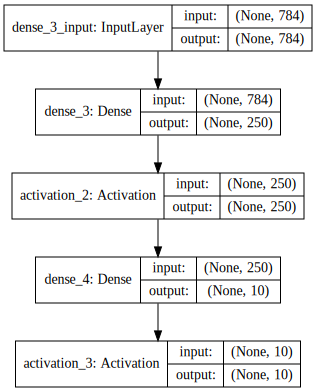

In [17]:
SVG(model_to_dot(model, show_shapes=True, show_layer_names=True).create(prog='dot', format='svg'))

In [18]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(1e-2), metrics=['accuracy']) 

In [19]:
model.fit(X, y, nb_epoch=10, shuffle=True, batch_size=32)  

Epoch 1/10
42000/42000 [==============================] - 7s - loss: 14.5152 - acc: 0.0994     
Epoch 2/10
 5920/42000 [===>..........................] - ETA: 6s - loss: 14.5008 - acc: 0.1003

KeyboardInterrupt: 

In [14]:
classes=model.predict_classes(X,verbose=0)  
test_accuracy = np.mean(np.equal(np.argmax(y,1),classes))  
print("Train Accuracy {}".format(test_accuracy))

Train Accuracy 0.204738095238


### Q: Accuracy is too low. Can we improve?
Hint: try a different optimizer (e.g. RMSprop)

In [20]:
model = Sequential()
model.add(Convolution2D(5, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(7, 3, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

/Users/shahab/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(5, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  
/Users/shahab/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(7, (3, 3), activation="relu")`
  This is separate from the ipykernel package so we can avoid doing imports until


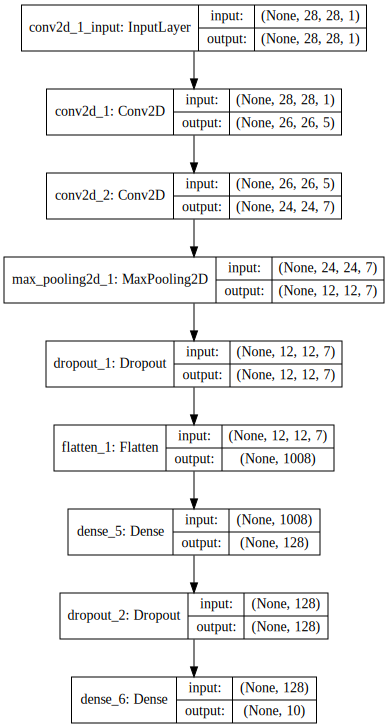

In [21]:
SVG(model_to_dot(model, show_shapes=True, show_layer_names=True).create(prog='dot', format='svg'))

In [22]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [23]:
model.fit(X.reshape(len(X),28,28,1), y, 
          batch_size=32, nb_epoch=10, verbose=1)

Epoch 1/10
42000/42000 [==============================] - 22s - loss: 5.0732 - acc: 0.6003    
Epoch 2/10
42000/42000 [==============================] - 22s - loss: 0.3334 - acc: 0.9020    
Epoch 3/10
42000/42000 [==============================] - 22s - loss: 0.2299 - acc: 0.9311    
Epoch 4/10
42000/42000 [==============================] - 22s - loss: 0.1843 - acc: 0.9437    
Epoch 5/10
42000/42000 [==============================] - 22s - loss: 0.1541 - acc: 0.9529    
Epoch 6/10
42000/42000 [==============================] - 22s - loss: 0.1351 - acc: 0.9589    
Epoch 7/10
42000/42000 [==============================] - 22s - loss: 0.1229 - acc: 0.9621    
Epoch 8/10
42000/42000 [==============================] - 22s - loss: 0.1095 - acc: 0.9664    
Epoch 9/10
42000/42000 [==============================] - 22s - loss: 0.1045 - acc: 0.9682    
Epoch 10/10
42000/42000 [==============================] - 22s - loss: 0.0949 - acc: 0.9700    


### Q: What we measured was training accuracy. What's the test accuracy?

### Q: How would batch_size, and epoch effect accuracy?